
# 📊 Operation Clean Air: Comprehensive Air Quality Analysis

**Course:** ES 114 - IITGN  
**Mission:** Analyze air quality data to uncover insights that can shape environmental policies.  
**Tools:** NumPy, Pandas, Matplotlib, Seaborn, SciPy

---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [ ]:
data = pd.read_csv('Data.csv')
state_data = pd.read_csv('State_data.csv')
ncap_funding = pd.read_csv('NCAP_Funding.csv')

display(data.head(), state_data.head(), ncap_funding.head())

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


## 🌍 Spatial Aggregation

#### Q1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [ ]:
data_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_cleaned = data_df.dropna(subset=["PM2.5", "state"])

state_avg_pm25 = data_cleaned.groupby("state")["PM2.5"].mean()

highest_pm25_state = state_avg_pm25.idxmax()
highest_pm25_value = state_avg_pm25.max()

print(f"State with highest PM2.5 concentration: {highest_pm25_state}")
print(f"Average PM2.5 concentration: {highest_pm25_value}")


State with highest PM2.5 concentration: Delhi
Average PM2.5 concentration: 104.1009176780069


#### Q2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [ ]:
data_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_2023 = data_df[(data_df["Timestamp"].dt.year == 2023) & (data_df["PM2.5"] > 300)]

data_2023_cleaned = data_2023.dropna(subset=["state"])

hazardous_days_per_state = data_2023_cleaned.groupby("state")["Timestamp"].nunique()

most_hazardous_state = hazardous_days_per_state.idxmax()
most_hazardous_days = hazardous_days_per_state.max()

print(f"State with the most hazardous PM2.5 days in 2023: {most_hazardous_state}")
print(f"Number of hazardous days: {most_hazardous_days}")


State with the most hazardous PM2.5 days in 2023: Delhi
Number of hazardous days: 49


#### Q3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

ANS. To measure variability in PM2.5 levels across monitoring stations in each state for 2023, we can use standard deviation (σ). A higher standard deviation indicates greater fluctuations in PM2.5 levels.

In [ ]:
idata_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')
data_2023 = data_df[data_df["Timestamp"].dt.year == 2023]

data_2023_cleaned = data_2023.dropna(subset=["PM2.5", "state"])

state_pm25_variability = data_2023_cleaned.groupby("state")["PM2.5"].std()
highest_variability_state = state_pm25_variability.idxmax()
highest_variability_value = state_pm25_variability.max()

print(f"State with highest PM2.5 variability in 2023: {highest_variability_state}")
print(f"Standard deviation of PM2.5 levels: {highest_variability_value}")


State with highest PM2.5 variability in 2023: Delhi
Standard deviation of PM2.5 levels: 82.79710576209911


#### Q4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [ ]:
data_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_covid_period = data_df[(data_df["Timestamp"].dt.year >= 2020) & (data_df["Timestamp"].dt.year <= 2021)]
data_covid_cleaned = data_covid_period.dropna(subset=["PM2.5", "state"])

state_avg_pm25_covid = data_covid_cleaned.groupby("state")["PM2.5"].mean()
lowest_pm25_state = state_avg_pm25_covid.idxmin()
lowest_pm25_value = state_avg_pm25_covid.min()

print(f"State with lowest average PM2.5 during COVID period (2020-2021): {lowest_pm25_state}")
print(f"Average PM2.5 concentration: {lowest_pm25_value}")


State with lowest average PM2.5 during COVID period (2020-2021): Mizoram
Average PM2.5 concentration: 14.323350150801287


## 🗓️ Temporal Aggregation

#### Q1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [ ]:
data_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_aug_2020 = data_df[(data_df["Timestamp"].dt.year == 2020) & (data_df["Timestamp"].dt.month == 8)]

data_aug_2020_cleaned = data_aug_2020.dropna(subset=["PM2.5", "station"])
highest_pm25_station_row = data_aug_2020_cleaned.loc[data_aug_2020_cleaned["PM2.5"].idxmax()]

highest_pm25_station = highest_pm25_station_row["station"]
highest_pm25_value = highest_pm25_station_row["PM2.5"]

print(f"Station with the highest PM2.5 in August 2020: {highest_pm25_station}")
print(f"Highest PM2.5 value: {highest_pm25_value}")


Station with the highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
Highest PM2.5 value: 805.51


#### Q2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


Why is Winter more polluted?

1.Temperature Inversion: Cold air traps pollutants near the
surface, preventing dispersion.

2.Increased Biomass Burning: More heating and burning of wood, coal, and waste during winter.

3.Low Wind Speeds: Less wind means pollutants stay concentrated in the air.

4.Fog and Smog Formation: Water droplets trap pollutants, making the air quality worse.

In [ ]:
data_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_2018 = data_df[(data_df["Timestamp"].dt.year == 2018) &
                     (data_df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

data_2018_cleaned = data_2018.dropna(subset=["PM2.5"])

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return None

data_2018_cleaned["Season"] = data_2018_cleaned["Timestamp"].dt.month.apply(get_season)

data_2018_cleaned = data_2018_cleaned.dropna(subset=["Season"])

seasonal_avg_pm25 = data_2018_cleaned.groupby("Season")["PM2.5"].mean()

highest_pollution_season = seasonal_avg_pm25.idxmax()
highest_pollution_value = seasonal_avg_pm25.max()

print("Average PM2.5 concentration per season in 2018:")
print(seasonal_avg_pm25)
print(f"\nSeason with the highest pollution: {highest_pollution_season}")
print(f"Highest average PM2.5 concentration: {highest_pollution_value}")


Average PM2.5 concentration per season in 2018:
Season
Monsoon    34.425196
Winter     67.492344
Name: PM2.5, dtype: float64

Season with the highest pollution: Winter
Highest average PM2.5 concentration: 67.4923443634478


#### Q3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
#### Calculate the monthly average PM2.5 for weekdays and weekends separately
 X-axis: Months (January to December).

Y-axis: Average PM2.5 levels.

Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

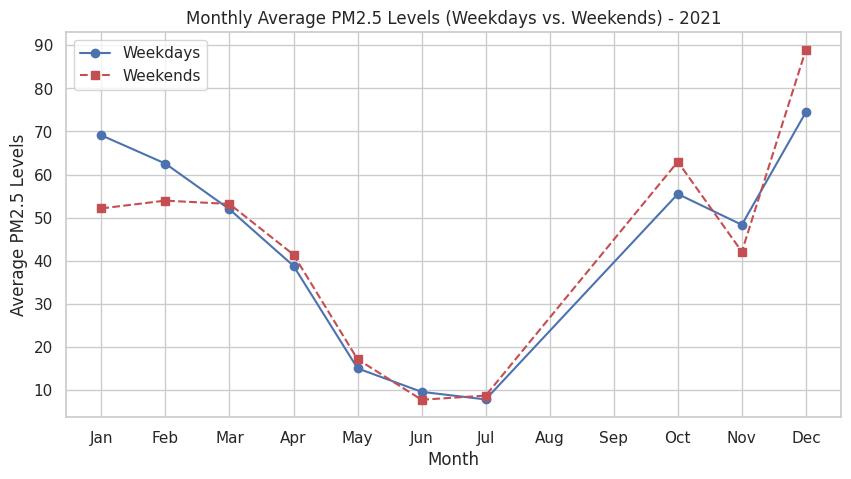

In [ ]:
data_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_2021 = data_df[(data_df["Timestamp"].dt.year == 2021) &
                     (data_df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

data_2021_cleaned = data_2021.dropna(subset=["PM2.5"])

def get_day_type(weekday):
    if weekday < 5:
        return "Weekday"
    else:
        return "Weekend"

data_2021_cleaned["DayType"] = data_2021_cleaned["Timestamp"].dt.weekday.apply(get_day_type)

monthly_avg_pm25 = data_2021_cleaned.groupby([data_2021_cleaned["Timestamp"].dt.month, "DayType"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekday"], marker='o', linestyle='-', label="Weekdays", color='b')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekend"], marker='s', linestyle='--', label="Weekends", color='r')

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels (Weekdays vs. Weekends) - 2021")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()

## 🌍 Spatio-Temporal Aggregation

#### Q1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [ ]:
data_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_2022 = data_df[data_df["Timestamp"].dt.year == 2022]

data_2022_cleaned = data_2022.dropna(subset=["PM2.5", "state"])

summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

def categorize_season(month):
    if month in summer_months:
        return "Summer"
    elif month in monsoon_months:
        return "Monsoon"
    return None

data_2022_cleaned["Season"] = data_2022_cleaned["Timestamp"].dt.month.apply(categorize_season)

data_2022_seasonal = data_2022_cleaned.dropna(subset=["Season"])

statewise_avg_pm25 = data_2022_seasonal.groupby(["state", "Season"])["PM2.5"].mean().unstack()

statewise_avg_pm25["% Change"] = ((statewise_avg_pm25["Monsoon"] - statewise_avg_pm25["Summer"]) / statewise_avg_pm25["Summer"]) * 100

state_most_difference = statewise_avg_pm25["% Change"].abs().idxmax()
max_difference_value = statewise_avg_pm25.loc[state_most_difference, "% Change"]

print("State with the highest percentage difference in PM2.5 levels between Monsoon and Summer in 2022:")
print(f"{state_most_difference} with a change of {max_difference_value:.2f}%")


State with the highest percentage difference in PM2.5 levels between Monsoon and Summer in 2022:
Assam with a change of -61.18%


#### Q2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

Winter pollution is the most severe, while monsoon months provide the cleanest air due to natural cleansing by rain in Delhi

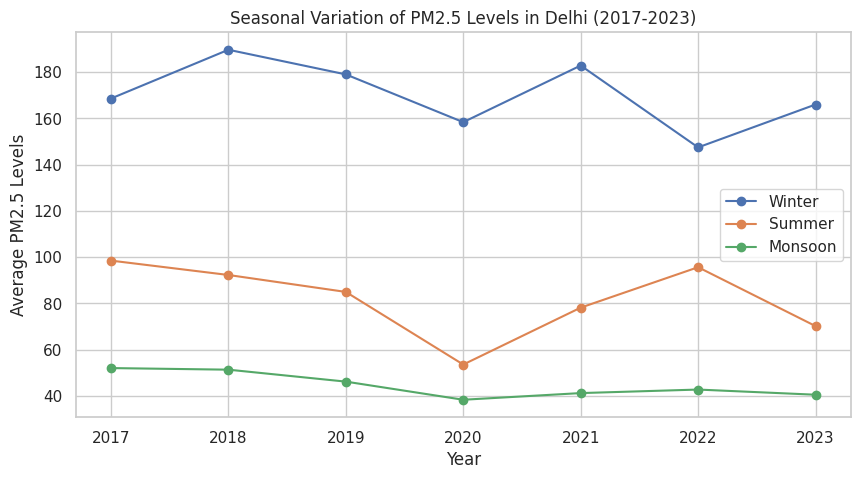

In [ ]:
data_path = "Data.csv"
data_df = pd.read_csv(data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

delhi_data = data_df[(data_df["state"] == "Delhi") & (data_df["Timestamp"].dt.year.between(2017, 2023))]

delhi_data_cleaned = delhi_data.dropna(subset=["PM2.5"])

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return None

delhi_data_cleaned["Season"] = delhi_data_cleaned["Timestamp"].dt.month.apply(get_season)

delhi_data_cleaned = delhi_data_cleaned.dropna(subset=["Season"])

seasonal_trend = delhi_data_cleaned.groupby([delhi_data_cleaned["Timestamp"].dt.year, "Season"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
for season in ["Winter", "Summer", "Monsoon"]:
    plt.plot(seasonal_trend.index, seasonal_trend[season], marker='o', linestyle='-', label=season)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

#### Q3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

Observations on Fluctuations:

Delhi had more fluctuations in PM2.5 levels compared to Mumbai.
This is evident from the higher standard deviation (84.93 for Delhi vs. 37.72 for Mumbai).
Possible reasons for Delhi's higher variability:
1. Seasonal pollution peaks (especially in winter).
2. Crop burning in nearby states.
3. Temperature inversions trapping pollutants.

Mumbai had a more stable trend due to its coastal location, frequent rains, and better air circulation.

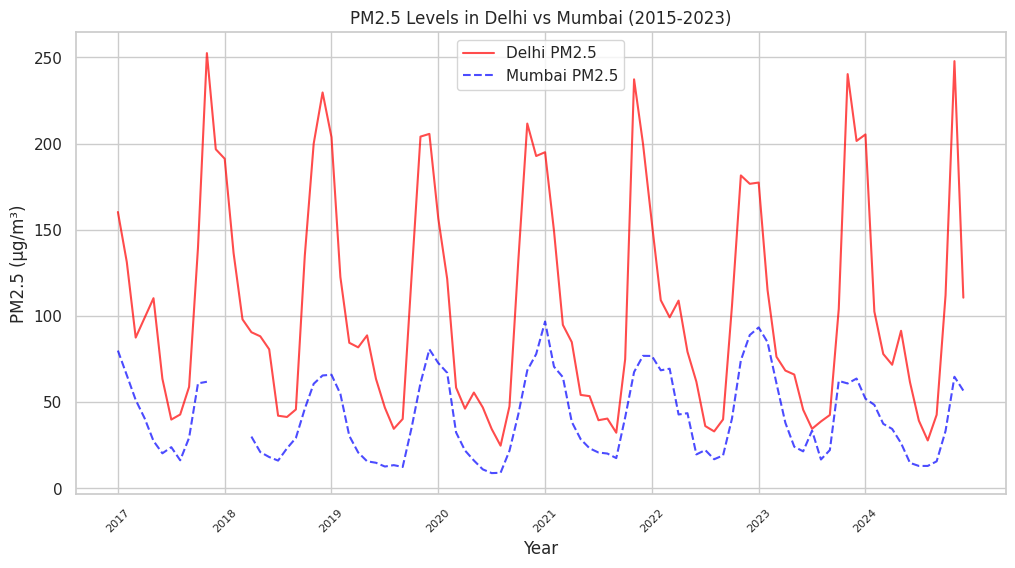

Delhi Fluctuation (Std Dev): 84.55 µg/m³
Mumbai Fluctuation (Std Dev): 37.74 µg/m³


In [ ]:
file_path = "Data.csv"
df = pd.read_csv(file_path)

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y-%m-%d", errors='coerce')

df["Year-Month"] = df["Timestamp"].dt.to_period("M")

grouped_data = df.groupby(["Year-Month", "city"])["PM2.5"].mean().unstack()

grouped_data.index = grouped_data.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data["Delhi"], label="Delhi PM2.5", color="red", alpha=0.7)
plt.plot(grouped_data.index, grouped_data["Mumbai"], label="Mumbai PM2.5", color="blue", alpha=0.7,linestyle='--')
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("PM2.5 Levels in Delhi vs Mumbai (2015-2023)")

years = sorted(df["Timestamp"].dt.year.dropna().unique())
year_labels = [str(year) for year in years]
plt.xticks([f"{year}-01" for year in year_labels], year_labels, rotation=45, fontsize=8)

plt.legend()
plt.grid(True)
plt.show()

delhi_fluctuation = df[df['city']=="Delhi"]['PM2.5'].std()
mumbai_fluctuation = df[df['city']=="Mumbai"]['PM2.5'].std()

print(f"Delhi Fluctuation (Std Dev): {delhi_fluctuation:.2f} µg/m³")
print(f"Mumbai Fluctuation (Std Dev): {mumbai_fluctuation:.2f} µg/m³")

## 👥 Population-Based Analysis

#### Q1. Which state in India has the highest number of monitoring stations relative to its population?

In [ ]:
state_data_path = "State_data.csv"
data_file_path = "Data.csv"

state_df = pd.read_csv(state_data_path)

data_df = pd.read_csv(data_file_path)

state_df.rename(columns={"State": "state", "Population": "population"}, inplace=True)
data_df.rename(columns={"station": "Station", "state": "state"}, inplace=True)

station_counts = data_df.groupby("state")["Station"].nunique().reset_index()
station_counts.columns = ["state", "num_stations"]

merged_df = pd.merge(station_counts, state_df, on="state")

merged_df["stations_per_million"] = (merged_df["num_stations"] / merged_df["population"]) * 1e6

highest_ratio_state = merged_df.loc[merged_df["stations_per_million"].idxmax()]

print("\nState with the highest number of monitoring stations relative to population:\n",highest_ratio_state)


State with the highest number of monitoring stations relative to population:
 state                   Chandigarh
num_stations                     3
population                 1055450
Area (km2)                     114
stations_per_million       2.84239
Name: 4, dtype: object


#### Q2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

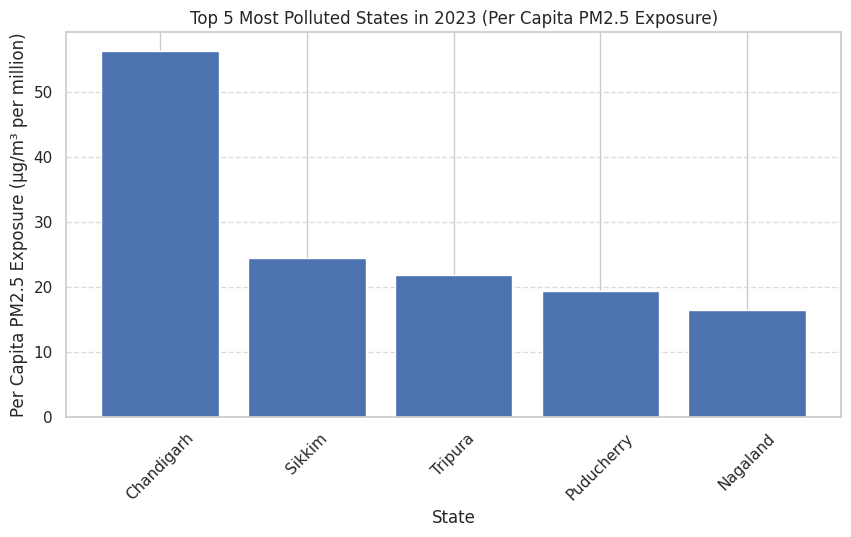

In [ ]:
state_data_path = "State_data.csv"
data_file_path = "Data.csv"

state_df = pd.read_csv(state_data_path)
data_df = pd.read_csv(data_file_path)

state_df.rename(columns={"State": "state", "Population": "population"}, inplace=True)
data_df.rename(columns={"state": "state", "station": "Station"}, inplace=True)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_2023 = data_df[data_df["Timestamp"].dt.year == 2023]

data_2023_cleaned = data_2023.dropna(subset=["PM2.5", "state"])

state_avg_pm25 = data_2023_cleaned.groupby("state")["PM2.5"].mean().reset_index()

merged_df = pd.merge(state_avg_pm25, state_df, on="state")

merged_df["pm2.5_per_million"] = merged_df["PM2.5"] / (merged_df["population"] / 1e6)

top_5_polluted = merged_df.nlargest(5, "pm2.5_per_million")

plt.figure(figsize=(10, 5))
plt.bar(top_5_polluted["state"], top_5_polluted["pm2.5_per_million"], color='b')

plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure (µg/m³ per million)")
plt.title("Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Q3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
 X-axis: Population density (people per square kilometer).

Y-axis: Average PM2.5 concentration.

Use a scatter plot to show the relationship, where each point represents a state.

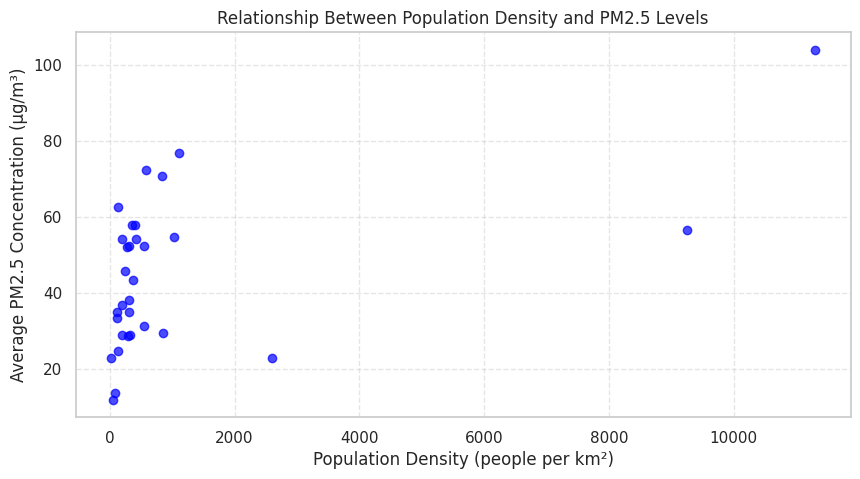

In [ ]:
state_data_path = "State_data.csv"
data_file_path = "Data.csv"

state_df = pd.read_csv(state_data_path)
data_df = pd.read_csv(data_file_path)

state_df.rename(columns={"State": "state", "Population": "population", "Area (km2)": "area"}, inplace=True)
data_df.rename(columns={"state": "state", "station": "Station"}, inplace=True)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_cleaned = data_df.dropna(subset=["PM2.5", "state"])

state_avg_pm25 = data_cleaned.groupby("state")["PM2.5"].mean().reset_index()

state_df["population_density"] = state_df["population"] / state_df["area"]

merged_df = pd.merge(state_avg_pm25, state_df, on="state")

plt.figure(figsize=(10, 5))
plt.scatter(merged_df["population_density"], merged_df["PM2.5"], color='blue', alpha=0.7)

plt.xlabel("Population Density (people per km²)")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.title("Relationship Between Population Density and PM2.5 Levels")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

## 🌐 Area-Based Analysis

#### Q1. Area Based [3 Marks]
Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

X-axis: States.

Y-axis: PM2.5 concentration per square kilometer.

Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

State with the highest PM2.5 concentration per square kilometer: Chandigarh


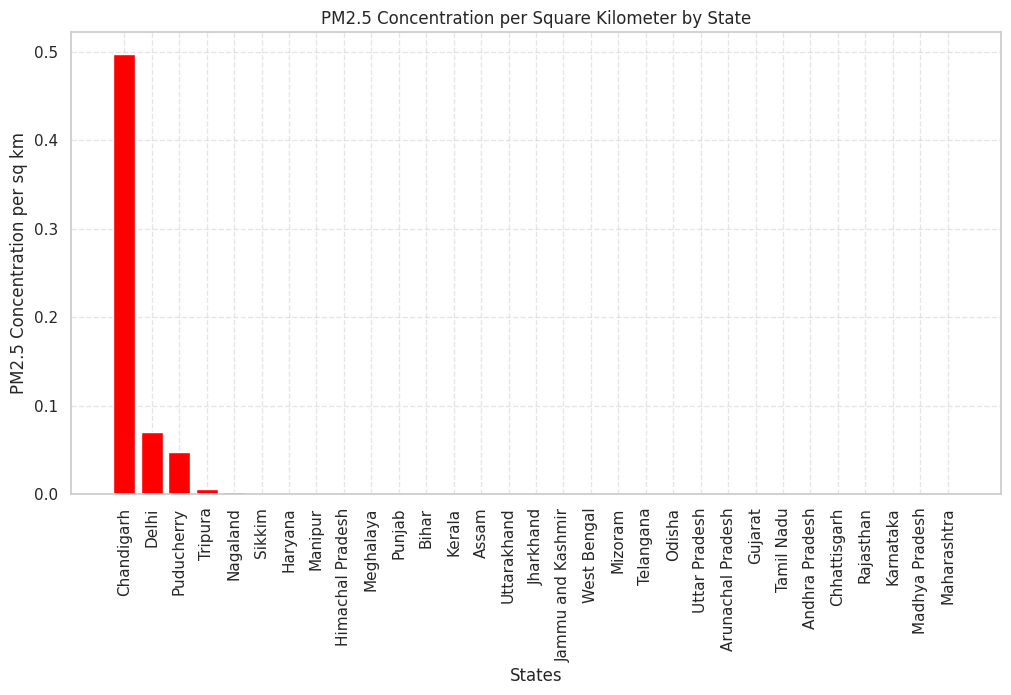

In [ ]:
data_df = pd.read_csv("Data.csv")
state_df = pd.read_csv("State_data.csv")

state_df.rename(columns={"State": "state", "Population": "population"}, inplace=True)

df_pollution_clean = data_df.dropna(subset=["PM2.5"])

pm25_avg_per_state = df_pollution_clean.groupby("state")["PM2.5"].mean().reset_index()

df_merged = pd.merge(pm25_avg_per_state,state_df, on='state')

df_merged["PM2.5 per sq km"] = df_merged["PM2.5"] / df_merged["Area (km2)"]
df_merged_sorted = df_merged.sort_values(by="PM2.5 per sq km", ascending=False)

most_polluted_state = df_merged_sorted.iloc[0]["state"]

print(f"State with the highest PM2.5 concentration per square kilometer: {most_polluted_state}")

plt.figure(figsize=(12, 6))
plt.bar(df_merged_sorted["state"], df_merged_sorted["PM2.5 per sq km"], color='red')
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per sq km")
plt.title("PM2.5 Concentration per Square Kilometer by State")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

####Q2.Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

State with the highest density of monitoring stations: Delhi


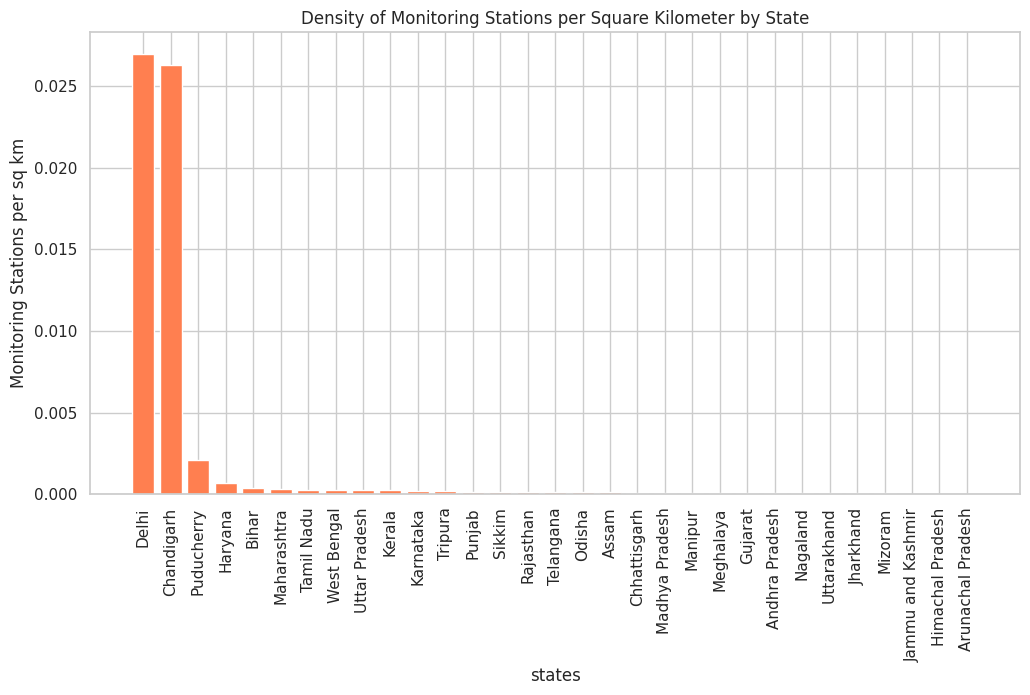

In [ ]:
data_df = pd.read_csv("Data.csv")
state_df = pd.read_csv("State_data.csv")

state_df.rename(columns={"State": "state", "Population": "population"}, inplace=True)
station_count_per_state = data_df.groupby("state")["station"].nunique().reset_index()

station_count_per_state.rename(columns={"station": "Number of Stations"}, inplace=True)
df_station_density = pd.merge(station_count_per_state,state_df,on="state")

df_station_density["Stations per sq km"] = df_station_density["Number of Stations"] / df_station_density["Area (km2)"]
df_station_density_sorted = df_station_density.sort_values(by="Stations per sq km", ascending=False)

most_dense_state = df_station_density_sorted.iloc[0]["state"]

print(f"State with the highest density of monitoring stations: {most_dense_state}")

plt.figure(figsize=(12, 6))
plt.bar(df_station_density_sorted["state"], df_station_density_sorted["Stations per sq km"], color='coral')
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("Monitoring Stations per sq km")
plt.title("Density of Monitoring Stations per Square Kilometer by State")
plt.show()

####Q3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

            State  Population  Area (km2)  Population Density      PM2.5
0     Maharashtra   112374333      307713          365.192023  46.440044
1  Madhya Pradesh    72626809      308252          235.608557  47.095952


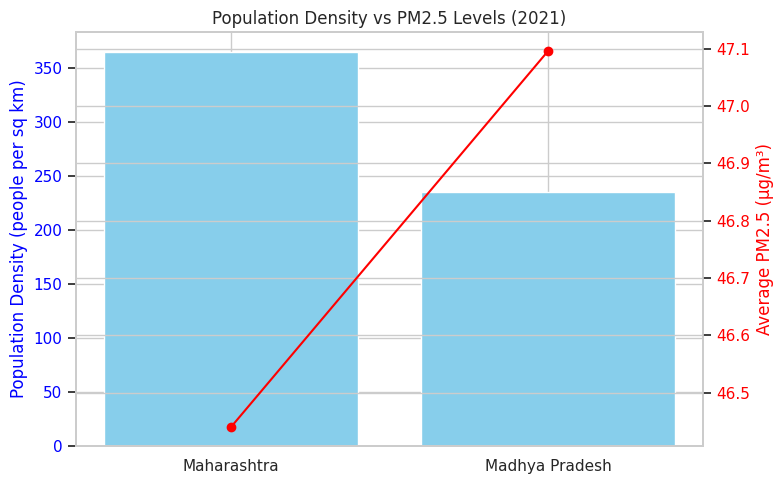

In [ ]:
df_states = pd.read_csv("State_data.csv")
df_pollution = pd.read_csv("Data.csv")

df_pollution["Timestamp"] = pd.to_datetime(df_pollution["Timestamp"], errors='coerce')

df_2021 = df_pollution[(df_pollution["Timestamp"].dt.year == 2021) &
                       (df_pollution["state"].isin(["Maharashtra", "Madhya Pradesh"]))]

pm25_avg = df_2021.groupby("state")["PM2.5"].mean().reset_index()

pop_area_data = df_states[df_states["State"].isin(["Maharashtra", "Madhya Pradesh"])][["State", "Population", "Area (km2)"]]

pop_area_data["Population Density"] = pop_area_data["Population"] / pop_area_data["Area (km2)"]

analysis_df = pop_area_data.merge(pm25_avg, left_on="State", right_on="state").drop(columns=["state"])

print(analysis_df)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(analysis_df["State"], analysis_df["Population Density"], color='skyblue', label="Population Density")
ax1.set_ylabel("Population Density (people per sq km)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(analysis_df["State"], analysis_df["PM2.5"], color='red', marker='o', linestyle='-', label="PM2.5 Levels")
ax2.set_ylabel("Average PM2.5 (µg/m³)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Population Density vs PM2.5 Levels (2021)")
fig.tight_layout()
plt.show()

## 💰 Funding-Based Analysis

#### Q1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [ ]:
funding_data_path = "NCAP_Funding.csv"
data_file_path = "Data.csv"

funding_df = pd.read_csv(funding_data_path)
data_df = pd.read_csv(data_file_path)

funding_df.rename(columns={"State": "state"}, inplace=True)
data_df.rename(columns={"state": "state"}, inplace=True)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_2021 = data_df[data_df["Timestamp"].dt.year == 2021]

data_2021_cleaned = data_2021.dropna(subset=["PM2.5", "state"])

funded_states = funding_df["state"].unique()
data_2021_cleaned["Funding_Status"] = data_2021_cleaned["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")

funding_comparison = data_2021_cleaned.groupby("Funding_Status")["PM2.5"].mean()

print("\nAverage PM2.5 Levels in 2021:")
print(funding_comparison)


Average PM2.5 Levels in 2021:
Funding_Status
Funded        62.055055
Not Funded    60.326211
Name: PM25, dtype: float64


#### Q2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

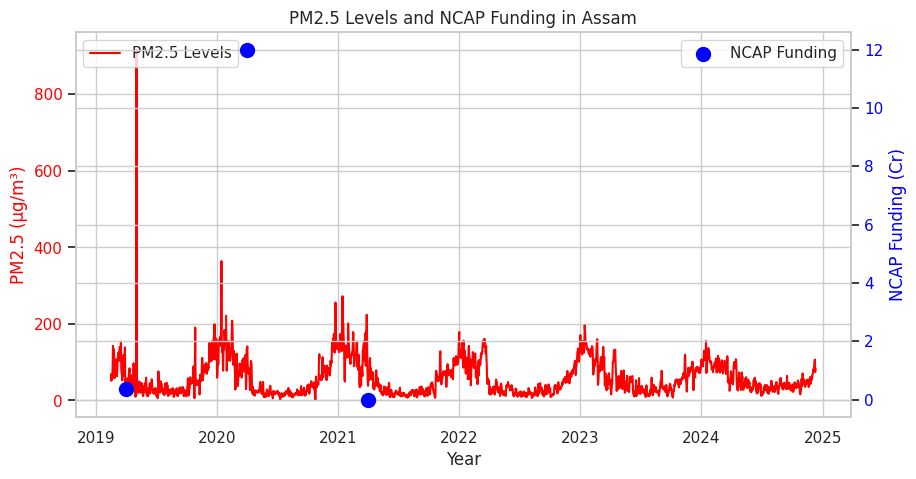

In [ ]:
data_path = "Data.csv"
ncap_path = "NCAP_Funding.csv"

pm25_data = pd.read_csv(data_path)
funding_data = pd.read_csv(ncap_path)

assam_pm25_data = pm25_data[pm25_data["state"] == "Assam"].copy()

assam_pm25_data["Timestamp"] = pd.to_datetime(assam_pm25_data["Timestamp"])

assam_pm25_trend = assam_pm25_data.groupby("Timestamp")["PM2.5"].mean().reset_index()

assam_funding_data = funding_data[funding_data["State"] == "Assam"].copy()
funding_columns = [
    "Amount released during FY 2019-20",
    "Amount released during FY 2020-21",
    "Amount released during FY 2021-22",
    "Total fund released",
]
for col in funding_columns:
    assam_funding_data[col] = pd.to_numeric(assam_funding_data[col], errors="coerce")
assam_funding_summary = assam_funding_data[funding_columns].sum().reset_index()
assam_funding_summary.columns = ["Year", "Funding Amount"]
year_mapping = {
    "Amount released during FY 2019-20": "2019-04-01",
    "Amount released during FY 2020-21": "2020-04-01",
    "Amount released during FY 2021-22": "2021-04-01",
}
assam_funding_summary["Year"] = assam_funding_summary["Year"].map(year_mapping)
assam_funding_summary.dropna(inplace=True)
assam_funding_summary["Year"] = pd.to_datetime(assam_funding_summary["Year"])
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(assam_pm25_trend["Timestamp"], assam_pm25_trend["PM2.5"], color="red", label="PM2.5 Levels")
ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.scatter(assam_funding_summary["Year"], assam_funding_summary["Funding Amount"], color="blue", label="NCAP Funding", marker="o", s=100)
ax2.set_ylabel("NCAP Funding (Cr)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("PM2.5 Levels and NCAP Funding in Assam")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

#### 3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

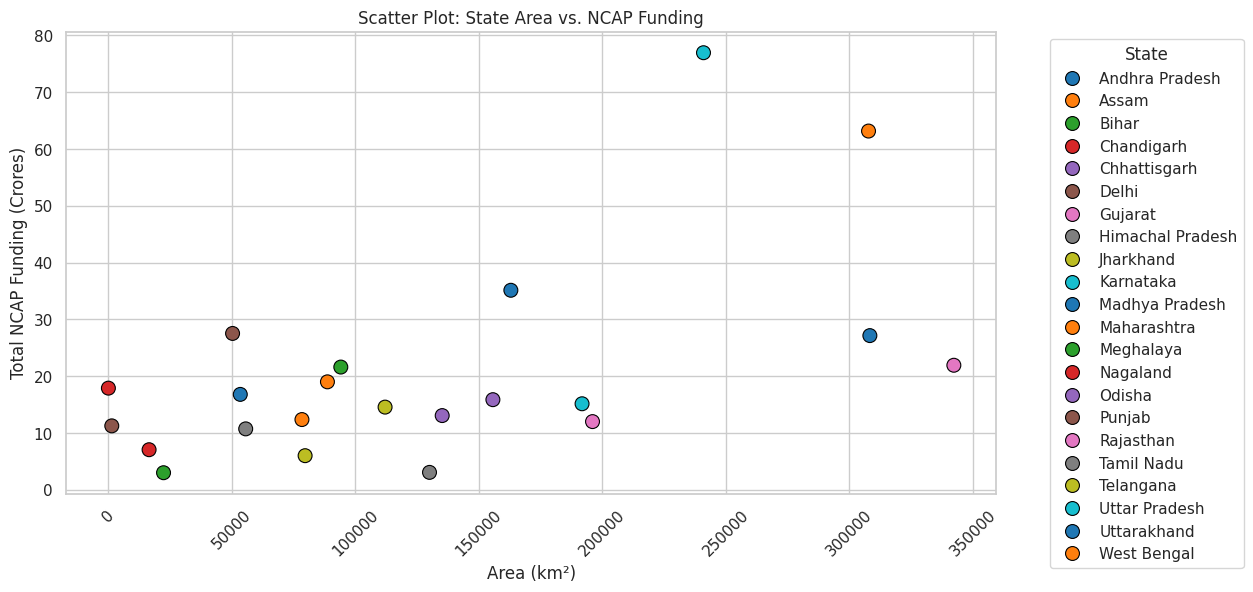

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

state_data_path = "State_data.csv"
funding_data_path = "NCAP_Funding.csv"

state_df = pd.read_csv(state_data_path)
funding_df = pd.read_csv(funding_data_path)

state_df.rename(columns={"State": "state", "Area (km2)": "area"}, inplace=True)
funding_df.rename(columns={"State": "state"}, inplace=True)

funding_columns = [
    "Amount released during Fd Y 2019-20",
    "Amount releaseduring FY 2020-21",
    "Amount released during FY 2021-22"
]

for col in funding_columns:
    funding_df[col] = pd.to_numeric(funding_df[col], errors='coerce')

state_funding = funding_df.groupby("state")[funding_columns].sum().reset_index()
state_funding["Total_Funding"] = state_funding[funding_columns].sum(axis=1)

merged_df = pd.merge(state_funding[["state", "Total_Funding"]], state_df[["state", "area"]], on="state")

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    x=merged_df["area"],
    y=merged_df["Total_Funding"],
    hue=merged_df["state"],
    palette="tab10",
    s=100,
    edgecolor="black"
)

plt.xlabel("Area (km²)")
plt.ylabel("Total NCAP Funding (Crores)")
plt.title("Scatter Plot: State Area vs. NCAP Funding")

plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
for label in scatter.get_xticklabels():
    label.set_rotation(45)
plt.show()

## 📈 Miscellaneous Questions

#### Q1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]

In [ ]:
data_file_path = "Data.csv"

data_df = pd.read_csv(data_file_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')

data_2023 = data_df[data_df["Timestamp"].dt.year == 2023]

data_2023_cleaned = data_2023.dropna(subset=["PM2.5", "city"])

most_polluted_city = data_2023_cleaned.groupby("city")["PM2.5"].mean().idxmax()

city_data = data_2023_cleaned[data_2023_cleaned["city"] == most_polluted_city]

total_days = city_data["Timestamp"].dt.date.nunique()

hazardous_days = city_data[city_data["PM2.5"] > 300]["Timestamp"].dt.date.nunique()

hazardous_days_percentage = (hazardous_days / total_days) * 100

print(f"Most Polluted City in 2023: {most_polluted_city}")
print(f"Total Days Recorded: {total_days}")
print(f"Hazardous Days (PM2.5 > 300 µg/m³): {hazardous_days}")
print(f"Percentage of Hazardous Days: {hazardous_days_percentage:.2f}%")

Most Polluted City in 2023: Darbhanga
Total Days Recorded: 13
Hazardous Days (PM2.5 > 300 µg/m³): 3
Percentage of Hazardous Days: 23.08%


#### Q2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]

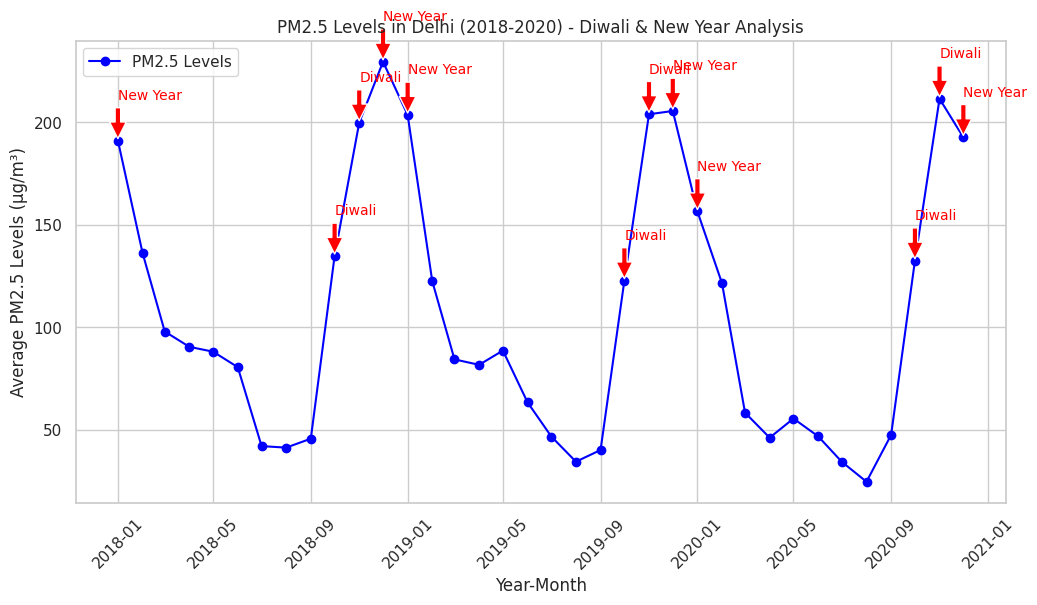

In [ ]:
data_file_path = "Data.csv"

data_df = pd.read_csv(data_file_path)

data_df.rename(columns={"state": "State", "Timestamp": "Date"}, inplace=True)

data_df["Date"] = pd.to_datetime(data_df["Date"], errors='coerce')

delhi_data = data_df[(data_df["State"] == "Delhi") & (data_df["Date"].dt.year.between(2018, 2020))]

delhi_data["Year-Month"] = delhi_data["Date"].dt.to_period("M")

diwali_months = [10, 11]
new_year_months = [12, 1]

def check_month (month):
    if month in diwali_months :
        return "Diwali"
    elif month in new_year_months:
        return "New Year"
    else:
        return "Regular"
delhi_data["Festival"] = delhi_data["Date"].dt.month.apply(check_month)

monthly_pm25 = delhi_data.groupby(["Year-Month", "Festival"])["PM2.5"].mean().reset_index()

monthly_pm25["Year-Month"] = monthly_pm25["Year-Month"].astype(str)
monthly_pm25["Year-Month"] = pd.to_datetime(monthly_pm25["Year-Month"])

plt.figure(figsize=(12, 6))
plt.plot(monthly_pm25["Year-Month"], monthly_pm25["PM2.5"], marker="o", linestyle="-", label="PM2.5 Levels", color="blue")

spike_data = monthly_pm25[monthly_pm25["Festival"] != "Regular"]

for i in range(len(spike_data)):
    plt.annotate(f"{spike_data.iloc[i]['Festival']}",
                 xy=(spike_data.iloc[i]["Year-Month"], spike_data.iloc[i]["PM2.5"]),
                 xytext=(spike_data.iloc[i]["Year-Month"], spike_data.iloc[i]["PM2.5"] + 20),
                 arrowprops=dict(facecolor="red", shrink=0.05),
                 fontsize=10, color="red")

plt.xlabel("Year-Month")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.title("PM2.5 Levels in Delhi (2018-2020) - Diwali & New Year Analysis")
plt.xticks(rotation=45)
plt.grid(True)

plt.legend()
plt.show()

#### Q3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]

Highest Funded State: Andhra Pradesh


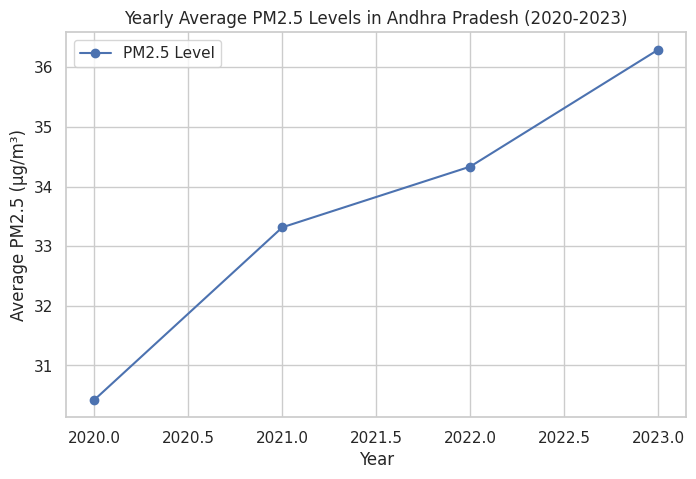

Year
2020    30.425130
2021    33.316491
2022    34.334527
2023    36.294259
Name: PM2.5, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ncap_funding_df = pd.read_csv("NCAP_Funding.csv")

ncap_funding_df["Amount released during FY 2020-21"] = pd.to_numeric(
    ncap_funding_df["Amount released during FY 2020-21"].replace("-", "0"), errors="coerce"
)

state_funding_2020 = ncap_funding_df.groupby("State")["Amount released during FY 2020-21"].sum()

highest_funded_state = state_funding_2020.idxmax()

air_pollution_df = pd.read_csv("Data.csv")

air_pollution_df["Timestamp"] = pd.to_datetime(air_pollution_df["Timestamp"], format="%Y-%m-%d", errors="coerce")

state_pollution_df = air_pollution_df[air_pollution_df["state"] == highest_funded_state]
print("Highest Funded State:",highest_funded_state)
state_pollution_df["Year"] = state_pollution_df["Timestamp"].dt.year
yearly_pm25 = state_pollution_df.groupby("Year")["PM2.5"].mean()

yearly_pm25 = yearly_pm25.loc[2020:2023]

plt.figure(figsize=(8, 5))
plt.plot(yearly_pm25.index, yearly_pm25.values, marker="o", linestyle="-", color="b", label="PM2.5 Level")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"Yearly Average PM2.5 Levels in {highest_funded_state} (2020-2023)")
plt.grid(True)
plt.legend()
plt.show()

print(yearly_pm25)

In [ ]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 65.6 MB/s eta 0:00:00


#### Q4. Draw the map of India and plot the sensor locations on the map.[1.5 Mark]

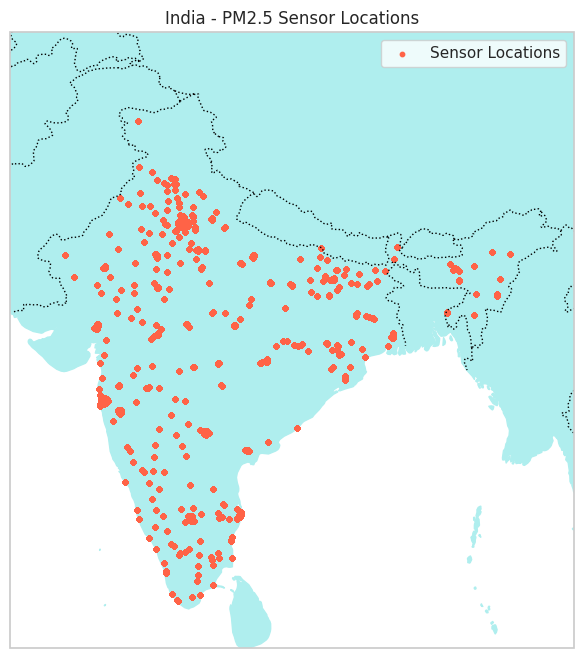

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

data_file_path = "Data.csv"
data_df = pd.read_csv(data_file_path)

sensor_locations = data_df.dropna(subset=["latitude", "longitude"])

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=1)
ax.add_feature(cfeature.LAND, color="paleturquoise")
ax.set_extent([68, 98, 6, 38])

plt.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color="tomato", s=10, label="Sensor Locations", transform=ccrs.PlateCarree())

plt.title("India - PM2.5 Sensor Locations")
plt.legend()
plt.show()


# Tell us something new

#### Q1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

####Let me tell you an interesting fact that most air pollution discussions and policies focus on major cities like Delhi and Mumbai, while several smaller cities with equally high or worsening pollution levels remain overlooked. Identifying these emerging pollution hotspots early can help policymakers take preventive action before the crisis escalates.

####This fact is crucial for policymakers because it highlights emerging pollution hotspots that are currently being overlooked in air quality management plans. By identifying these smaller cities with high PM2.5 levels, policymakers can take proactive measures such as expanding air quality monitoring networks, enforcing stricter emission regulations on local industries, and implementing targeted pollution control programs. Early intervention in these cities is cost-effective compared to addressing a full-blown air pollution crisis later, as seen in Delhi. Additionally, recognizing these trends allows for more equitable distribution of NCAP funding and resources, ensuring that pollution control efforts are not just concentrated in metro areas but reach all affected regions.

In [ ]:
air_pollution_data = pd.read_csv("Data.csv")

metro_cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Pune", "Ahmedabad"]

metro_cities_data = air_pollution_data[air_pollution_data['city'].isin(metro_cities)]
non_metro_cities = air_pollution_data[~air_pollution_data['city'].isin(metro_cities)]

city_pm25_avg_non_metro = non_metro_cities.groupby('city')['PM2.5'].mean().reset_index()
city_pm25_avg_metro = metro_cities_data.groupby('city')['PM2.5'].mean().reset_index()

high_pollution_threshold = 90
high_pollution_cities = city_pm25_avg_non_metro[city_pm25_avg_non_metro['PM2.5'] > high_pollution_threshold]

high_pollution_cities = high_pollution_cities.sort_values(by='PM2.5', ascending=False)
city_pm25_avg_metro = city_pm25_avg_metro.sort_values(by='PM2.5', ascending=False)

print("Highly Polluted Non-Metropolitan Cities:")
print(high_pollution_cities)

print("\nPM2.5 Levels in Metropolitan Cities:")
print(city_pm25_avg_metro)


Highly Polluted Non-Metropolitan Cities:
              city       PM2.5
58        Byrnihat  137.546358
34       Begusarai  119.810165
75       Darbhanga  100.996960
97       Ghaziabad  100.861468
194          Noida   97.584511
42         Bhiwadi   97.192828
101       Gurugram   95.808487
90       Faridabad   93.521050
245          Siwan   92.889437
99   Greater Noida   91.209646

PM2.5 Levels in Metropolitan Cities:
        city       PM2.5
3      Delhi  104.100918
0  Ahmedabad   54.519622
5    Kolkata   51.217236
7       Pune   46.260275
6     Mumbai   43.392956
4  Hyderabad   38.114469
1  Bengaluru   33.141754
2    Chennai   32.868448
